### The "Why" of Sampling: Population vs. Sample

In data analysis, we are often interested in understanding the characteristics of a large group, known as the **population**. The population is the complete set of all possible observations for a given context. This could be all the people in a country, every coffee bean grown in a year, or all website visits for a specific product.

Collecting data for an entire population, a process known as a **census**, is often prohibitively expensive, time-consuming, or simply impossible. **Sampling** provides a practical solution by allowing us to work with a **sample**, which is a manageable subset of the population. We can then use statistics to draw conclusions about the entire population based on what we observe in the sample.

#### Population Parameters vs. Point Estimates

The goal of sampling is typically to estimate a numerical summary of the population. The terminology to distinguish between a calculation on a population and on a sample is crucial:

  * **Population Parameter**: A numerical value calculated on the **entire population**. This is the true, but often unknown, value we want to find (e.g., the true average rating of all coffees).
  * **Point Estimate** (or **Sample Statistic**): The corresponding numerical value calculated on a **sample**. We use this point estimate as our best guess for the unknown population parameter (e.g., the average rating of 50 sampled coffees).


```python
import pandas as pd
import numpy as np

# Create a generic "population" DataFrame
population = pd.DataFrame({'value': np.random.normal(loc=100, scale=10, size=1000)})

# Take a random sample of 50 observations
sample = population.sample(n=50, random_state=42)

# 1. Calculate the population parameter (we can do this because we created the data)
population_mean = population['value'].mean()
print(f"Population Mean (Parameter): {population_mean:.4f}")

# 2. Calculate the point estimate from the sample
sample_mean = sample['value'].mean()
print(f"Sample Mean (Point Estimate): {sample_mean:.4f}")
```
### The Peril of Bad Sampling: Bias

For a point estimate to be a reliable guess of the population parameter, the sample must be **representative** of the population. If the sample is skewed in some way, it is considered **biased**, and the resulting point estimates will be inaccurate.

A common cause of this is **convenience sampling**, where data is collected using the easiest method available rather than a random one. The infamous 1936 *Literary Digest* poll is a classic example. Their sample was biased towards wealthier individuals, causing them to incorrectly predict the outcome of the presidential election. Similarly, taking the first 10 rows of a sorted dataset (`df.head(10)`) is a convenience sample and will likely produce a biased result.

### The Solution: Random Sampling and Reproducibility

#### Simple Random Sampling

To avoid bias, we use **random sampling**, where each member of the population has an equal chance of being selected. In pandas, this is easily achieved with the `.sample()` method. A random sample is much more likely to have a distribution that reflects the overall population.

#### Pseudo-Random Numbers and Reproducibility

Computers do not generate truly random numbers from physical processes. Instead, they use algorithms to generate **pseudo-random numbers**. These algorithms start with an initial value called a **seed** and then calculate the next "random" number based on the previous one.

The most important property of this process is that the **same seed value will always produce the exact same sequence of random numbers**. This is not a flaw; it is a critical feature that ensures **reproducibility**. By setting a seed before you sample, you guarantee that you (or a colleague) can re-run your code and get the exact same sample, making your analysis verifiable and reproducible. In `numpy` and `pandas`, the seed is set using `np.random.seed()` or the `random_state` parameter.

```python
# Set a seed and draw a sample
np.random.seed(42)
sample1 = population['value'].sample(n=5)
print(f"Sample 1 (seed=42):\n{sample1}\n")

# Draw another sample without resetting the seed - it will be different
sample2 = population['value'].sample(n=5)
print(f"Sample 2 (no seed reset):\n{sample2}\n")

# RESET the seed to the same value and draw a third sample
np.random.seed(42)
sample3 = population['value'].sample(n=5)
print(f"Sample 3 (seed reset to 42):\n{sample3}\n")
```

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
spotify_url = "https://assets.datacamp.com/production/repositories/5975/datasets/18d07c39535b900b64dc145985d9e8dfbf2ca498/spotify_2000_2020.feather"
spotify_population = pd.read_feather(spotify_url)
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [14]:
# Sample 1000 rows from spotify_population, assigning to spotify_sample.
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
display(spotify_sample)

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
24486,0.005380,"['$uicideBoy$', 'Pouya']",0.797,169320.0,2.822000,0.516,1.0,4VsMart0lkjUtyQnmxloK6,0.431000,1.0,0.0728,-6.286,1.0,$outh $ide $uicide,69.0,2015-06-15,0.0831,109.997,0.0477,2015.0
38255,0.023900,"['Jack White', 'Alicia Keys']",0.420,262240.0,4.370667,0.766,0.0,3ODl8J0TZAykdMCtCIO28n,0.000031,4.0,0.1100,-4.231,0.0,Another Way to Die,56.0,2007-11-09,0.1790,68.393,0.4100,2007.0
4811,0.000402,['Saosin'],0.320,234547.0,3.909117,0.940,0.0,0nQcyybXeatlDXgvQOrT1n,0.140000,2.0,0.2350,-4.823,0.0,It's Far Better To Learn,46.0,2006-01-01,0.0866,182.189,0.0724,2006.0
36072,0.428000,['Monchy & Alexandra'],0.888,220547.0,3.675783,0.760,0.0,6u0YMyjnpSHi8EyHRkCCAP,0.000375,1.0,0.1190,-2.639,0.0,No Es una Novela,53.0,2006,0.0292,127.966,0.8270,2006.0
18862,0.014000,['Westside Connection'],0.899,206867.0,3.447783,0.588,1.0,4EGduKhpEdXZFsZELRkvfs,0.000000,9.0,0.3660,-7.072,1.0,Bow Down,41.0,2001-12-04,0.2890,92.921,0.4130,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17858,0.062700,['Stone Sour'],0.286,325627.0,5.427117,0.547,0.0,0pVL6gE6ebXHExO9IzrJDQ,0.000003,4.0,0.1120,-7.923,1.0,Taciturn,55.0,2012-10-17,0.0318,174.717,0.4530,2012.0
8822,0.042800,['Mandy Moore'],0.493,222467.0,3.707783,0.673,0.0,7068X4wz4hhlhzj0cTlXU4,0.000002,0.0,0.3970,-6.042,1.0,Cry,53.0,2004-11-16,0.0396,173.274,0.5220,2004.0
1322,0.359000,"['Eminem', 'Kendrick Lamar']",0.766,296953.0,4.949217,0.941,1.0,0iMN420Q45isZVNlAqzPTW,0.000000,9.0,0.5850,-2.546,1.0,Love Game,55.0,2013-11-05,0.1800,105.519,0.7070,2013.0
4219,0.007040,['Aaron Carter'],0.785,194253.0,3.237550,0.879,0.0,5paEiUa6tDA61S5NqTJG6t,0.001660,8.0,0.0781,-5.474,1.0,I Want Candy,38.0,2000,0.0681,110.022,0.9600,2000.0


In [15]:
# Calculate the mean duration_minutes and from spotify_population using pandas.
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration_minutes and from spotify_sample using pandas.
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140900073
3.769899533333333


### Simple sampling and calculating with NumPy
You can also use `numpy` to calculate parameters or statistics from a list or `pandas` Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [16]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.10663


## What is Convenience Sampling?

Convenience sampling is the practice of collecting data using the easiest method available. This might involve surveying people in a specific location (like a shopping mall), using the first `n` rows of a dataset, or polling individuals who are easily reachable. While this method is straightforward, it carries a significant risk: the individuals or data points that are "convenient" to access are often systematically different from the population as a whole. This discrepancy leads to sample bias.

### Historical Failures: The Dangers of Sample Bias

History is filled with examples where convenience sampling led to dramatically incorrect conclusions.

#### The 1936 Literary Digest Poll

One of the most famous examples is the 1936 *Literary Digest* presidential poll. The magazine surveyed millions of people and confidently predicted that Alf Landon would defeat Franklin D. Roosevelt, winning 57% of the vote. However, the actual result was a landslide victory for Roosevelt, who won 62% of the vote. The poll's failure was due to **sample bias**. Their sample was drawn from sources like telephone directories and club membership lists, which in 1936, over-represented wealthier Americans who were more likely to vote for Landon. The sample was not representative of the general electorate, and the poll's prediction was consequently worthless.

### The Disneyland Paris Analogy

A more modern example illustrates the same principle. If you were to estimate the average age of all people in France, you could conduct a survey at Disneyland Paris. You might find a mean age of 24.6 years in your sample. However, this would be a **poor estimate** of the true average age in France (which was 41.2 in 2015), because visitors to a theme park are not representative of the country's entire population.

### Convenience Sampling in Code

In data analysis, taking the first `n` rows of a DataFrame with `.head(n)` is a form of convenience sampling. If the data is sorted in any way, this sample will be biased.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a generic "population" DataFrame, sorted by value.
# This mimics a dataset like coffee ratings where the best are listed first.
population = pd.DataFrame({
    'rating': np.sort(np.random.normal(loc=82, scale=3, size=1000))[::-1]
})

# Population Parameter 
population_mean = population['rating'].mean()
print(f"True Population Mean Rating: {population_mean:.2f}")

# Convenience Sample 
convenience_sample = population.head(10)
convenience_mean = convenience_sample['rating'].mean()
print(f"Convenience Sample Mean (first 10 rows): {convenience_mean:.2f}")
```

As shown, the mean of the convenience sample is a significant overestimate of the true population mean because the sample only includes the highest-rated items.

### Visualizing the Bias

A histogram clearly shows how unrepresentative a convenience sample can be.

```python
import seaborn as sns

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Convenience sample distribution
sns.histplot(data=convenience_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Convenience Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

The convenience sample's distribution is a skewed, narrow slice of the population's distribution and does not reflect its true shape or center.

### The Alternative: Simple Random Sampling

To avoid sample bias, **simple random sampling** is used. This method ensures that every member of the population has an equal chance of being selected. A random sample is far more likely to be representative.

```python
# Random Sample 
np.random.seed(42) # for reproducibility
random_sample = population.sample(n=10)
random_mean = random_sample['rating'].mean()
print(f"Random Sample Mean: {random_mean:.2f}")

# Visualize the random sample distribution 
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population distribution
sns.histplot(data=population, x='rating', bins=np.arange(70, 95, 1), ax=axes[0])
axes[0].set_title("Population Distribution")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Count")

# Random sample distribution
sns.histplot(data=random_sample, x='rating', bins=np.arange(70, 95, 1), ax=axes[1])
axes[1].set_title("Random Sample Distribution")
axes[1].set_xlabel("Rating")

plt.tight_layout()
plt.show()
```

In [17]:
spotify_population["acousticness"]

0        0.97200
1        0.32100
2        0.00659
3        0.00390
4        0.12200
          ...   
41651    0.17300
41652    0.01670
41653    0.53800
41654    0.07140
41655    0.10900
Name: acousticness, Length: 41656, dtype: float64

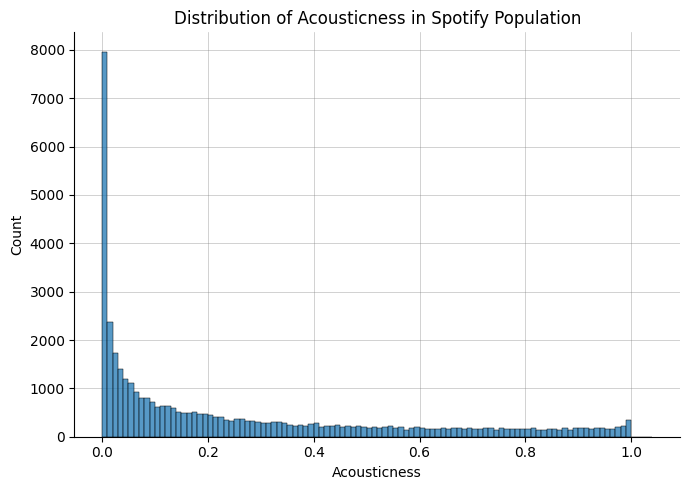

In [32]:
# Plot a histogram of the acousticness from spotify_population with wider bins using pandas .hist().
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(
    x="acousticness",
    data=spotify_population,
    bins=np.arange(0, 1.05, 0.01),
)
sns.despine()

ax.set(xlabel="Acousticness", ylabel="Count", title="Distribution of Acousticness in Spotify Population")
ax.grid(True, alpha=0.5, linewidth=0.5, color="grey")
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### Are findings from the sample generalizable?
You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

In [ ]:
spotify_mysterious_sample = pd.read_csv()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.histplot(spotify_)